# About the Project


In [1]:
#create a Buniness case-->finding most profitable group within entire customer

#Prepare the data-->more data,we can find more trends/pattern in data,we also need different set offeature depending on importnat matrix
#for the business;then preprocessing the data.to remove inconsistency in the data,this eventually helps in data analysis.

#Data Analysis ans Exploration-->helps to find interesting relation and find pattern in our data;here we can understand customer interest,choices;we are able to find important attributes

#Clustering Analysis-->accurately segment the customer

#Choosing optimal Hyperparameters-->choosing the best set of hyperparametres for an algorithm :it is also called as "tunning"
#Visualization and intrepertation-->it helps to improve business markets;gives clear concept 

In [2]:
#what is customer segmentation:diving the companies customer into a group that reflect  similarities in each group
#this process require the thought out strategy,understanding how to manage and gruop our customer and which data you use to do it

In [3]:
#types of segmentation factors
#1.demographic segmentation:-->age,gender,income,location,education
#2.Psychographic segmentation:-->interest,lifestyle,psychological influenser,motivation,priorities(personality describtion)
#3.Behavier segemtation-->Purchasing Habit,spending habits,user status,brand interaction,
#4.Geographic segmentation-->zip code,city,country,climate.urban/rural

In [1]:
#advantages of customer segmetation
#-->price optimization,enchances competitiviness,brand awareness,aquisition and retention,increase revene and RDI

In [2]:
#why ML-->ML model can process customer data and discover patterns difficult to spot through intuition and anual examination

In [3]:
#unsupervised ML-->it involves traing a machine using information that is neither classified or unlabeled and allowing the algorithm to act on that information without guidance

In [4]:
#k-mean algorithm-->is an iterative  agorithm that divides the datset into k differenrt cluster in such a way that each dataset belong to onlu=y one group that has similiar properties

In [5]:
#how to choose optimal K value--1-->elbow method :   2-->purpose basd-->

In [7]:
#step in K mean:initialization,cluster assignment,move the centriod,optimization,convergence

In [6]:
#environment and tools needed for projects:lanuage-->python,lib-->numpy,pandas,scikit,matplotlib,seaborn

# demo

# Customer Segmentation
Customer segmentation is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

The purpose of segmenting customers is to determine how to correlate to customers in multiple segments to maximize customer benefits. Perfectly done customer segmentation empowers marketers to interact with every customer in the best efficient approach.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
mall_customer_df=pd.read_csv("Mall_Customers.csv")

In [10]:
mall_customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
mall_customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
mall_customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
mall_customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
mall_customer_df.shape

(200, 5)

In [21]:
mall_customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [23]:
#customer id cloumns is not neccessar,lets drop
mall_customer_df.drop(["CustomerID"],axis=1,inplace=True)#axis is 1.we mention columns

In [24]:
mall_customer_df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data analysis and visualization

C:\Users\sarav\AppData\Local\Temp\ipykernel_31452\1172820913.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall_customer_df[x],bins=20)
C:\Users\sarav\AppData\Local\Temp\ipykernel_31452\1172820913.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mall_customer_df[x],bins=20)
C:\Users\sar

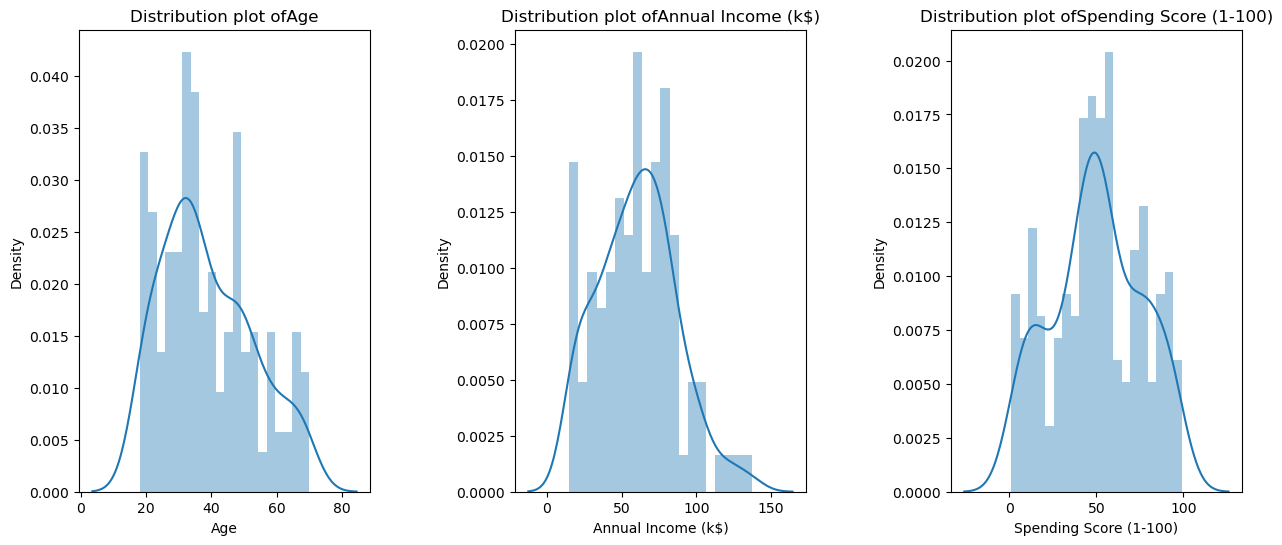

In [29]:
#distribution plot for age,annual income,and spending score
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(mall_customer_df[x],bins=20)
    plt.title("Distribution plot of{}".format(x))
plt.show()    


In [30]:
#from graph:age -->30-40,Annual-->50-60,spendingscore-->50 looks high

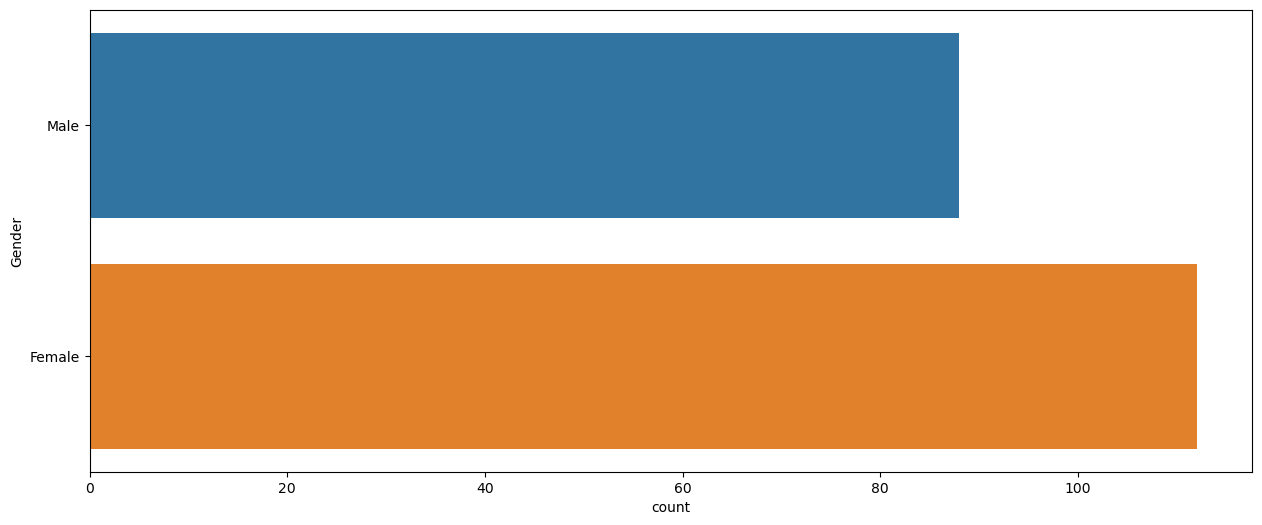

In [32]:
#graph for no of male and female:we use countplot
plt.figure(figsize=(15,6))
sns.countplot(y="Gender",data=mall_customer_df)
plt.show()

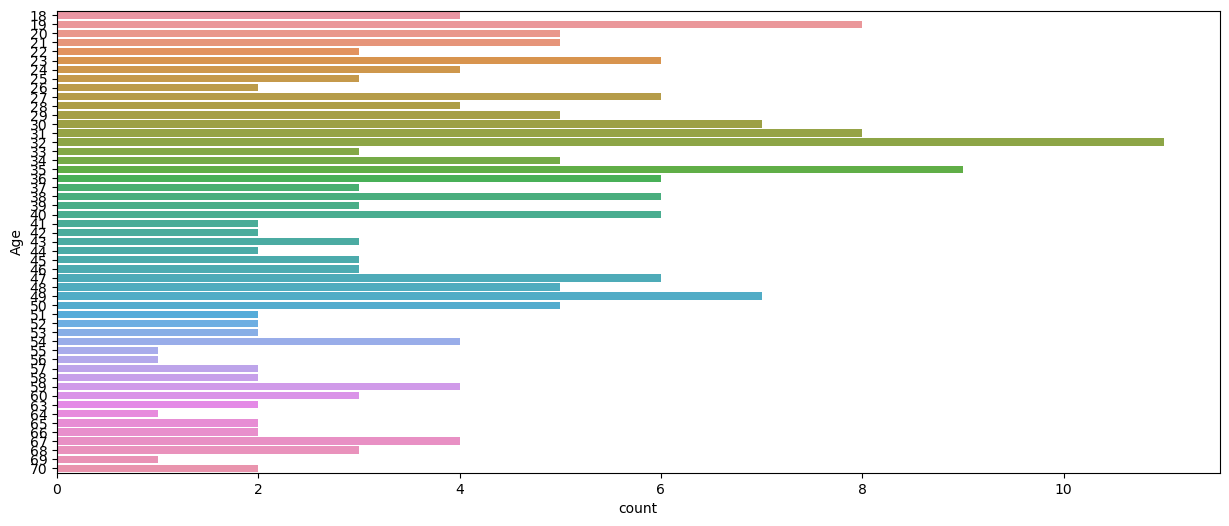

In [33]:
#graph for no of male and female:we use countplot
plt.figure(figsize=(15,6))
sns.countplot(y="Age",data=mall_customer_df)
plt.show()

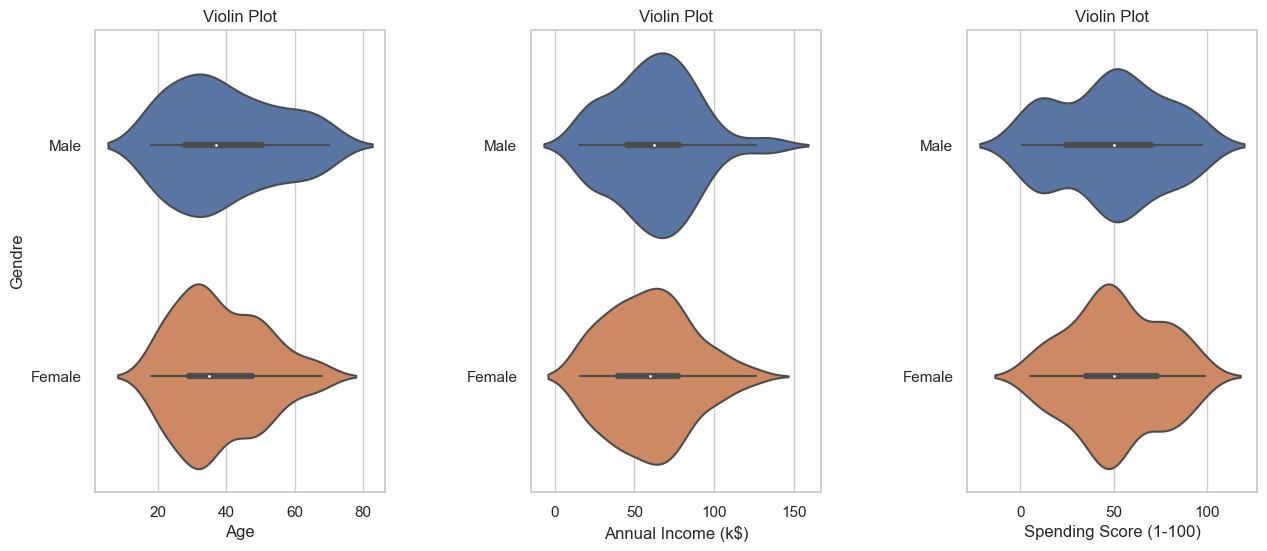

In [36]:
#gender based violin distribution for age,annualincome,spending score
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Gender",data=mall_customer_df)
    plt.ylabel("Gendre" if n ==1 else "")
    plt.title("Violin Plot")
plt.show()    

In [53]:
#to see at which age we have hihest number of customer
age_18_25=mall_customer_df.Age[(mall_customer_df.Age  >=18) & (mall_customer_df.Age<=25)]
age_26_35=mall_customer_df.Age[(mall_customer_df.Age  >=26) & (mall_customer_df.Age<=35)]
age_36_45=mall_customer_df.Age[(mall_customer_df.Age  >=36) & (mall_customer_df.Age<=45)]
age_46_55=mall_customer_df.Age[(mall_customer_df.Age  >=46) & (mall_customer_df.Age<=55)]
age_55_above=mall_customer_df.Age[(mall_customer_df.Age >=56)]



agex=["18_25","26_35","36_45","46_55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_above.values)]

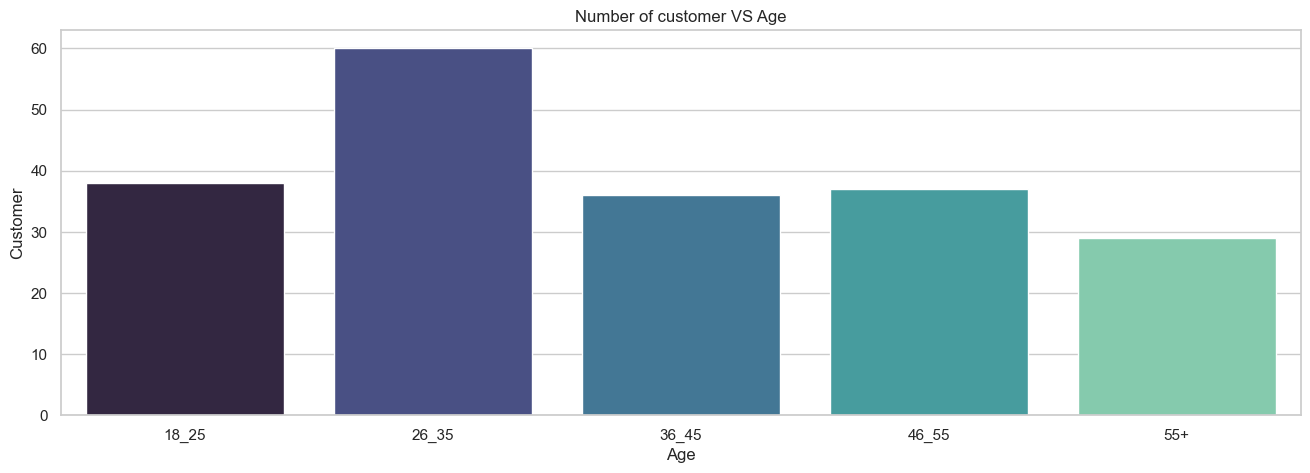

In [54]:
plt.figure(figsize=(16,5))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of customer VS Age")
plt.xlabel("Age")
plt.ylabel("Customer")
plt.show()

In [55]:
#we can see highest in age group 26-35

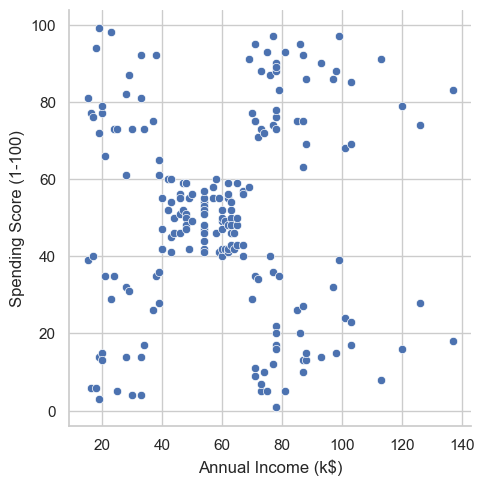

In [56]:
#lets see the relationship between annual income and spending score
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=mall_customer_df)
plt.show()

In [ ]:
#here the graph shows high relationship when income is 60-80 and spending score is40-60

In [66]:
#now lets split the spending_score in different category as we did in age:spending score max and min values1-100
ss_1_20=mall_customer_df["Spending Score (1-100)"][(mall_customer_df["Spending Score (1-100)"]>= 1) & (mall_customer_df["Spending Score (1-100)"]<=20)]
ss_21_40=mall_customer_df["Spending Score (1-100)"][(mall_customer_df["Spending Score (1-100)"]>= 21) & (mall_customer_df["Spending Score (1-100)"]<=40)]
ss_41_60=mall_customer_df["Spending Score (1-100)"][(mall_customer_df["Spending Score (1-100)"]>= 41) & (mall_customer_df["Spending Score (1-100)"]<=60)]
ss_61_80=mall_customer_df["Spending Score (1-100)"][(mall_customer_df["Spending Score (1-100)"]>= 61) & (mall_customer_df["Spending Score (1-100)"]<=80)]
ss_81_100=mall_customer_df["Spending Score (1-100)"][(mall_customer_df["Spending Score (1-100)"]>= 81) & (mall_customer_df["Spending Score (1-100)"]<=100)]

ssx=["1_20","21_40","41_60","61_80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]


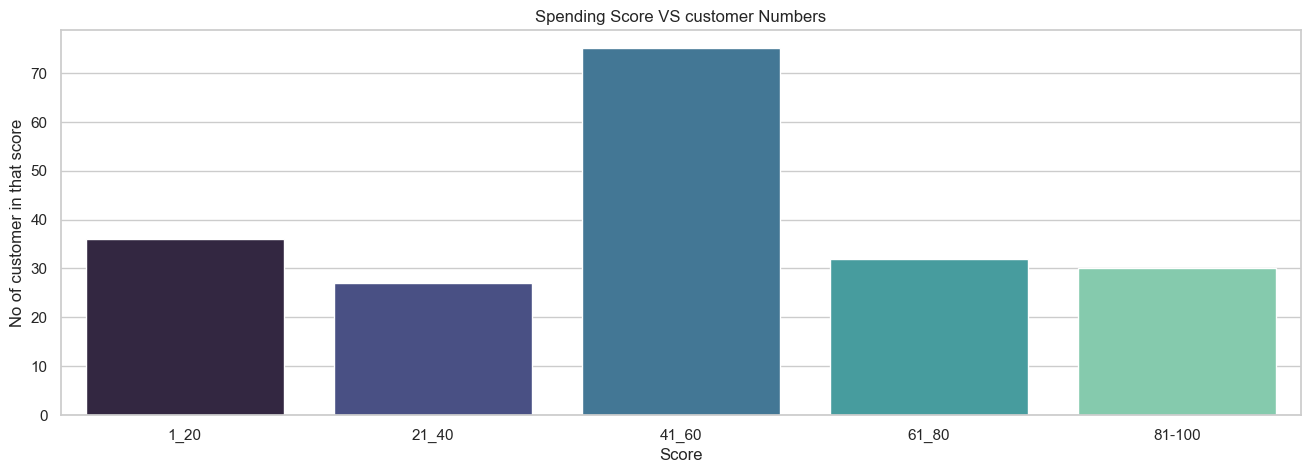

In [67]:
plt.figure(figsize=(16,5))
sns.barplot(x=ssx,y=ssy,palette="mako")
plt.title("Spending Score VS customer Numbers")
plt.xlabel("Score")
plt.ylabel("No of customer in that score")
plt.show()

In [78]:
#lets do the same for annual income:min and max for annual income 15 and 137  "Annual Income (k$)"
ai_1_30=mall_customer_df["Annual Income (k$)"][(mall_customer_df["Annual Income (k$)"]>= 1) & (mall_customer_df["Annual Income (k$)"]<=30)]
ai_31_60=mall_customer_df["Annual Income (k$)"][(mall_customer_df["Annual Income (k$)"]>= 31) & (mall_customer_df["Annual Income (k$)"]<=60)]
ai_61_90=mall_customer_df["Annual Income (k$)"][(mall_customer_df["Annual Income (k$)"]>= 61) & (mall_customer_df["Annual Income (k$)"]<=90)]
ai_81_120=mall_customer_df["Annual Income (k$)"][(mall_customer_df["Annual Income (k$)"]>= 91) & (mall_customer_df["Annual Income (k$)"]<=120)]
ai_121_150=mall_customer_df["Annual Income (k$)"][(mall_customer_df["Annual Income (k$)"]>= 121) & (mall_customer_df["Annual Income (k$)"]<=150)]

aix=["$1-$30,00","$31,000-$60,000","$61,000-$90,000","$91,000-$120,000","$121,000-$150,00"]
aiy=[len(ai_1_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_81_120.values),len(ai_121_150.values)]
print(aiy)

[32, 66, 80, 18, 4]


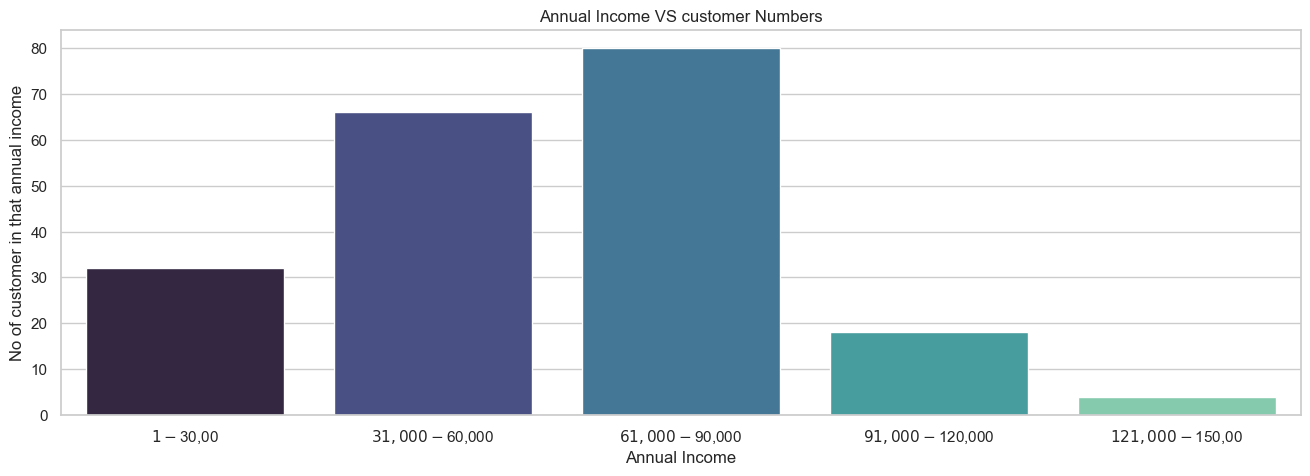

In [79]:
plt.figure(figsize=(16,5))
sns.barplot(x=aix,y=aiy,palette="mako")
plt.title("Annual Income VS customer Numbers")
plt.xlabel("Annual Income")
plt.ylabel("No of customer in that annual income")
plt.show()

# Clustering

In [117]:
#finding optimal no of cluster
#lets start with age and spending score
X1=mall_customer_df.loc[:,["Age","Spending Score (1-100)"]].values

In [147]:
#import warnings
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action = 'ignore')
#plt.style.use(['seaborn-bright', 'dark_background'])

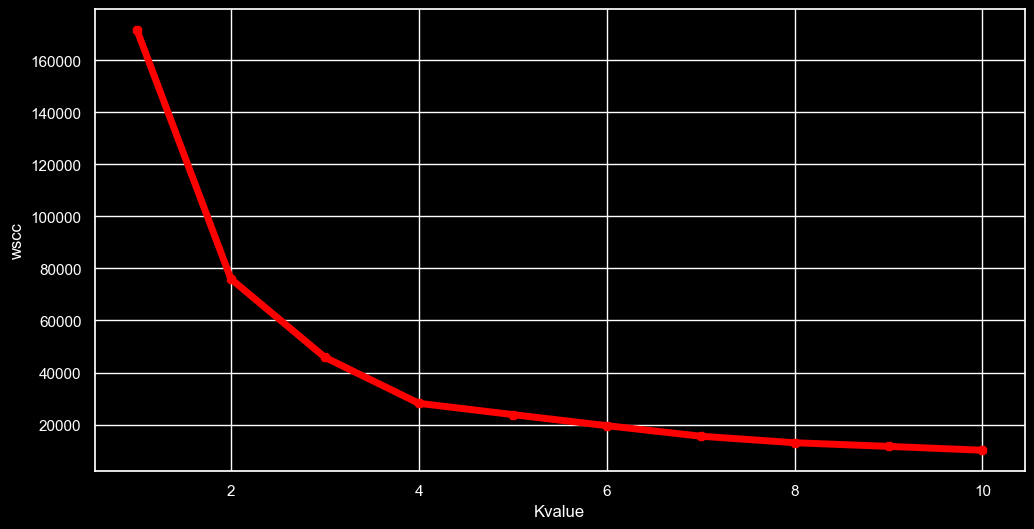

In [148]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid
plt.plot(range(1,11),wcss,linewidth=5,color="red",marker="8")
plt.xlabel("Kvalue")
plt.ylabel("wscc")
plt.show()

    

In [129]:
#its clear that the optimum is 4
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 1 2 0 1 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2
 0 2 0 3 0 3 1 2 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 0 1 0 3 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 3 0
 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [130]:
#to see the centriods
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


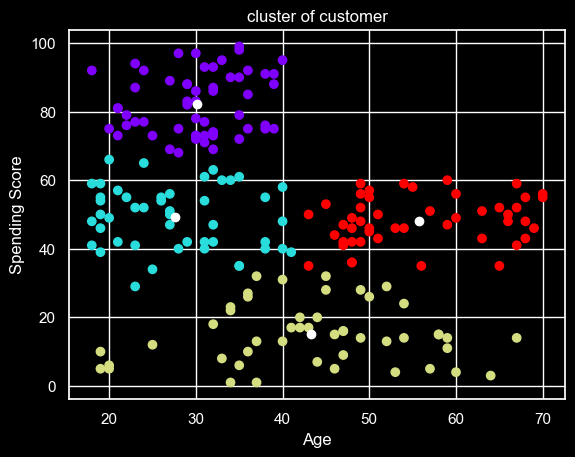

In [131]:
#lets visualize cluster in graph
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="white")
plt.title("cluster of customer")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

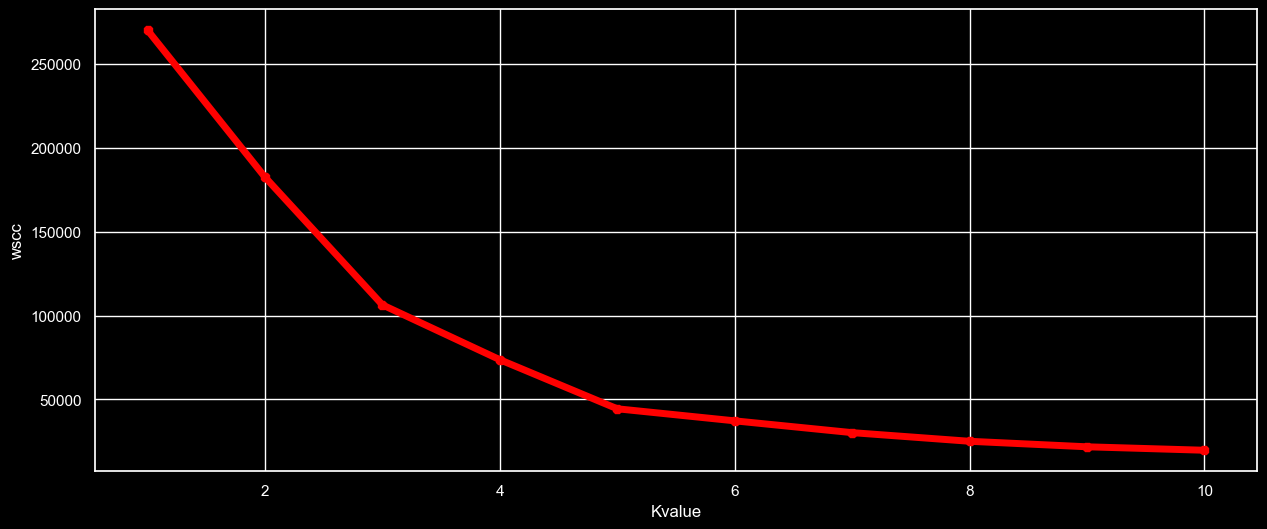

In [132]:
#let see with Annual income and spending score
X2=mall_customer_df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values


from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid
plt.plot(range(1,11),wcss,linewidth=5,color="red",marker="8")
plt.xlabel("Kvalue")
plt.ylabel("wscc")
plt.show()


In [133]:
#above graph it clear that optimum no of cluster is 5
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [134]:
#to see the centriods
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


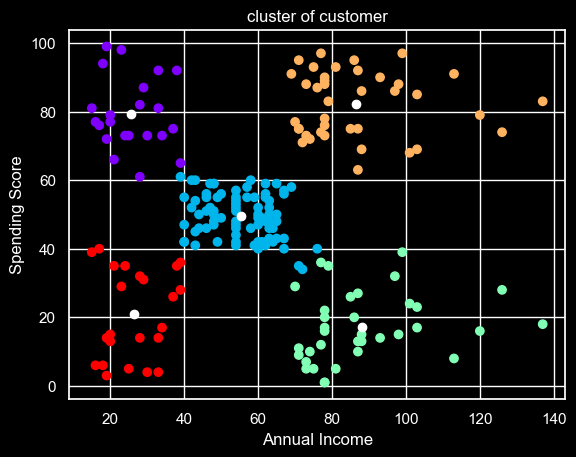

In [135]:
#lets visualize cluster in graph
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="white")
plt.title("cluster of customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

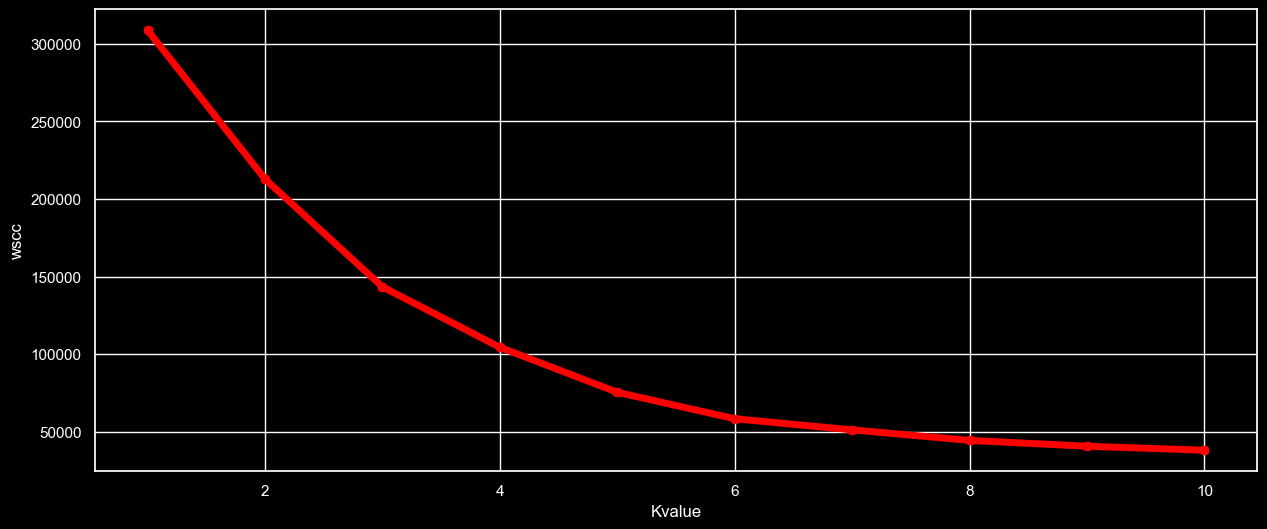

In [140]:
#lets consider age,annual income,spending score
#X3=mall_customer_df.loc[:,1:]
X3=mall_customer_df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid
plt.plot(range(1,11),wcss,linewidth=5,color="red",marker="8")
plt.xlabel("Kvalue")
plt.ylabel("wscc")
plt.show()


In [153]:
#here is clear its is 5
#above graph it clear that optimum no of cluster is 5
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [154]:
#to see the centriods
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]


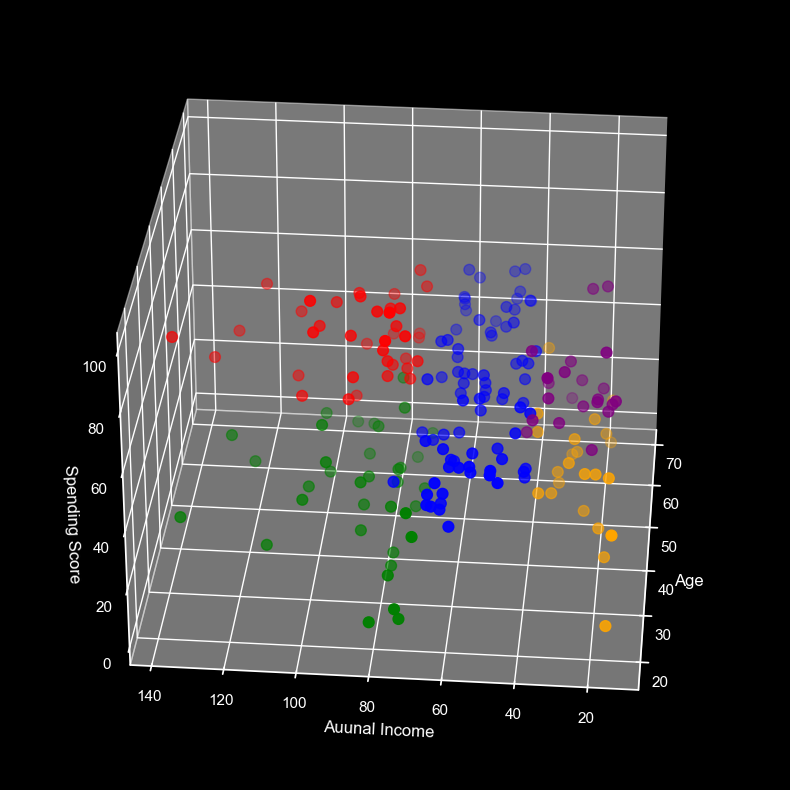

In [161]:
#lets visualize cluster in 3D sice we have more than 2 variable
clusters=kmeans.fit_predict(X3)
mall_customer_df["label"]=clusters

from mpl_toolkits.mplot3d import axes3d
#from mpl_toolkits.mplot3d import Axes3Dx
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(mall_customer_df.Age[mall_customer_df.label==0],mall_customer_df["Annual Income (k$)"][mall_customer_df.label==0],mall_customer_df["Spending Score (1-100)"][mall_customer_df.label==0],c="blue",s=60)
ax.scatter(mall_customer_df.Age[mall_customer_df.label==1],mall_customer_df["Annual Income (k$)"][mall_customer_df.label==1],mall_customer_df["Spending Score (1-100)"][mall_customer_df.label==1],c="red",s=60)
ax.scatter(mall_customer_df.Age[mall_customer_df.label==2],mall_customer_df["Annual Income (k$)"][mall_customer_df.label==2],mall_customer_df["Spending Score (1-100)"][mall_customer_df.label==2],c="green",s=60)
ax.scatter(mall_customer_df.Age[mall_customer_df.label==3],mall_customer_df["Annual Income (k$)"][mall_customer_df.label==3],mall_customer_df["Spending Score (1-100)"][mall_customer_df.label==3],c="orange",s=60)
ax.scatter(mall_customer_df.Age[mall_customer_df.label==4],mall_customer_df["Annual Income (k$)"][mall_customer_df.label==4],mall_customer_df["Spending Score (1-100)"][mall_customer_df.label==4],c="purple",s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Auunal Income")
ax.set_zlabel("Spending Score")
plt.show()